hi


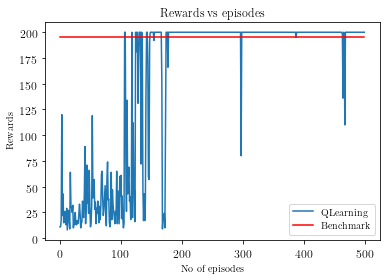

In [2]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from benchmark import benchmark

rewards =[]
class Qlearning():
    def __init__(self, buckets=(1, 1, 6,12), episodes=500, min_alpha=0.1, min_epsilon=0.1, gamma=1.0, divisor=25):
        self.buckets = buckets 
        self.episodes = episodes 
        self.MIN_ALPHA = min_alpha 
        self.MIN_EPSILON = min_epsilon 
        self.GAMMA = gamma 
        self.divisor = divisor
        self.env = gym.make('CartPole-v0')
        self.qTable = np.zeros(self.buckets + (self.env.action_space.n,))

    def discretize(self, obs):
        upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50)]
        lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50)]
        ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
        new_obs = [int(round((self.buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
        new_obs = [min(self.buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
        return tuple(new_obs)
    
    def discretizeStates(self,obs):
        x = obs[0]
        x_vel = obs[1]
        theta = obs[2]
        theta_vel = obs[3]
        res=[0,0,0,0]
#Discretizing cartpole location
        if(x < -0.8):
            box = 0
        elif(x < 0.8):
            box = 1
        else:
            box = 2
        res[0] = box
#Discretizing cartpole velocity
        if(x_vel < -0.5):
            box = 0
        elif(x_vel > -0.5 and x_vel < 0.5):
            #box += 3
            box = 1
        elif(x_vel > 0.5):
            box = 2
        res[1] = box
#Discretizing pole angle
        box = 0
        if(theta > -0.1047 and theta < -0.0174):
            box = 1
        elif(theta < 0 and theta > -0.0174):
            box = 2
        elif(theta > 0 and theta < 0.0174):
            box = 3
        elif(theta > 0.0174 and theta < 0.1047):
            box = 4
        elif(theta > 0.1047 and theta < 0.2094):
            box = 5
        res[2] = box
        
#Discretizing theta velocity
        box = 0
        if(theta_vel < -0.872):
            pass
        elif(theta < 0.872):
            box =1 
        else:
            box = 2
        res[3] = box
        return tuple(res)

    def selectAction(self,state, epsilon):
        if(np.random.random() < epsilon):
            return self.env.action_space.sample()
        return np.argmax(self.qTable[state])

    def updateQtable(self,state, new_state, reward, action, alpha):
         self.qTable[state][action] += alpha * (reward + self.GAMMA * np.max(self.qTable[new_state]) - self.qTable[state][action])

    def newEpsilon(self,e):
        return max(self.MIN_EPSILON, min(1, 1.0 - math.log10((e + 1) / self.divisor)))

    def newAlpha(self,e):
        return max(self.MIN_ALPHA, min(1, 1 - math.log10((e+1)/self.divisor)))

    def execute(self):
        bench = benchmark()
        for e in range(self.episodes):
            state = self.discretize(self.env.reset())
            i = 0
            totalReward = 0
            epsilon = self.newEpsilon(e)
            alpha = self.newAlpha(e)
            done = False
            while not done:
                #self.env.render()
                action = self.selectAction(state, epsilon)
                obs, reward, done, info = self.env.step(action)
                new_state = self.discretize(obs)
                self.updateQtable(state, new_state, reward, action, alpha)
                state = new_state
                totalReward += reward
                i+= 1
            bench.record_score(e+1, totalReward)
            rewards.append(totalReward)
        self.env.close()
        return rewards
    
        

if __name__ == "__main__":
    print('hi')
    q = Qlearning()
    rewards = q.execute()
    #bench = benchmark()
    #bench.record_score(range(1, q.episodes +1), rewards)
    #bench.plot_log()
    plt.figure()
    plot1, = plt.plot(np.linspace(0, q.episodes - 1, q.episodes), rewards)
    plot2, = plt.plot(np.linspace(0, q.episodes - 1, q.episodes), q.episodes*[195], color = 'red')
    plt.legend([plot1,plot2],['QLearning','Benchmark'])
    plt.xlabel('No of episodes')
    plt.ylabel('Rewards')
    plt.title('Rewards vs episodes')
    plt.show()

In [ ]:
print(rewards)